In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
import random 

path = r'C:\Users\Sebas!\Documents\GitHub\Project4\Datasets\Cleaned datasets'

In [3]:
csvfiles = {}
for n in range(1,13): #loop to gather all the datasets in one variable
    if n < 10:
        file = pd.read_csv(fr'{path}\movements_0{n}-2020.csv',index_col=False)
        csvfiles[f'movements_0{n}-2020'] = file
    elif n >= 10:
        file = pd.read_csv(fr'{path}\movements_{n}-2020.csv',index_col=False)
        csvfiles[f'movements_{n}-2020'] = file
for n in range(1,3):
    file = pd.read_csv(fr'{path}\movements_0{n}-2021.csv',index_col=False)
    csvfiles[f'movements_0{n}-2021'] = file

for key in csvfiles.keys(): #added date format and deleted the Unnamed:0 column
    csvfiles[key]['Data lanc'] = pd.to_datetime(csvfiles[key]['Data lanc'])
    csvfiles[key]['Data valor'] = pd.to_datetime(csvfiles[key]['Data valor'])

In [ ]:
csvfiles.keys()


In [ ]:
for key in csvfiles.keys():
    display(csvfiles[key])
    print(csvfiles[key].dtypes, '\n')

In [ ]:
"""Hypotesis: H0: mean_salary <=  900eur,             H1: mean_salary  > 900eur"""
"""
confidence = 0.95,   significance = 0.05"""
Pvalues = []
for n in range(0,3):
    #Sample
    randkey = random.sample(list(csvfiles.keys()),k=8)
    raw_sample = []
    for key in randkey:
        raw_sample.append(csvfiles[key]['Credito'])
    raw_sample = pd.concat(raw_sample, ignore_index=True)
    salary_sample = raw_sample[raw_sample > 110]
    salary_sample.drop(index=salary_sample[salary_sample==650.00].index,inplace=True)

#Compute stat
    mean_sample= salary_sample.mean()
    std_sample= salary_sample.std(ddof=1)
    stat = (mean_sample-900)/(std_sample/np.sqrt(len(salary_sample)))
    display(salary_sample)
    print('mean =',mean_sample,'  ','std=',std_sample)
    print('statistic=',stat)
    Pvalues.append(st.t.sf(abs(stat),len(salary_sample)-1))

In [ ]:
"""DECITION ON HYPOTESIS:
We see that our p-value > significance level, this means we have to reject the H1 and accept H0, my mean
salary is <= 900 euros monthly
"""
Pvalues

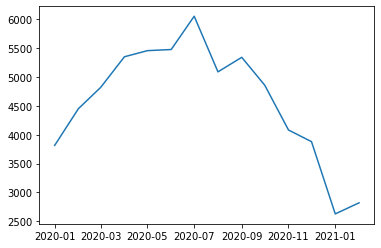

In [24]:
"""TIME SERIES"""
#get mean salary
meansavings =[]
for key in csvfiles.keys():
    meansavings.append(csvfiles[key]['Saldo'].mean())

#preparing the month 
months = []
for month in range(1,13):
    months.append(f'{month}/2020')
    if month >=12:
        for month in range(1,3):
            months.append(f'{month}/2021')

#creating dataframe
dfsavings = pd.DataFrame(data= meansavings, index=months)
dfsavings.index = pd.to_datetime(dfsavings.index,format = '%m/%Y')
dfsavings.drop(index = '2020-08-01')

plt.plot(dfsavings.index,dfsavings[0])

In [36]:
dfsavings.drop(axis=0 ,columns= 0,index = '2020-08-01')


KeyError: "['2020-08-01'] not found in axis"

In [31]:
dfsavings

,0
2020-01-01,3813.754359
2020-02-01,4450.793714
2020-03-01,4819.111818
2020-04-01,5350.091333
2020-05-01,5455.994545
2020-06-01,5475.750571
2020-07-01,6052.289000
2020-08-01,5088.623158
2020-09-01,5340.563000
2020-10-01,4857.351765
